In [1]:
import pandas as pd
 
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago")
df = df[0]

In [2]:
df

,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square
...,...,...
241,Wildwood,Forest Glen
242,Woodlawn,Woodlawn
243,Wrightwood,Ashburn
244,Wrightwood Neighbors,Lincoln Park


In [3]:
df2 = pd.read_html("https://docs.google.com/spreadsheets/d/1c-ERvr8xMCNyTZIq9dMHvgXMbUIAsExg8Uqo5924ZW0/edit?usp=sharing")
df2 = df2[0]

In [4]:
df2

,Unnamed: 0,A,B,C
0,1,Neighborhood,Latitude,Longitude
1,2,Douglas,NaN,NaN
2,3,Logan Square,NaN,NaN
3,4,Near North Side,NaN,NaN
4,5,Near West Side,NaN,NaN
...,...,...,...,...
95,96,West Englewood,41.77916282,-87.6770312
96,97,North Lawndale,41.86341092,-87.71929168
97,98,East Garfield Park,41.86982456,-87.71590385
98,99,Near North Side,41.90543825,-87.64798274


In [5]:
df2=df2.drop('Unnamed: 0', axis=1)

In [6]:
new_header = df2.iloc[0]
df2.columns = new_header
df2

,Neighborhood,Latitude,Longitude
0,Neighborhood,Latitude,Longitude
1,Douglas,NaN,NaN
2,Logan Square,NaN,NaN
3,Near North Side,NaN,NaN
4,Near West Side,NaN,NaN
...,...,...,...
95,West Englewood,41.77916282,-87.6770312
96,North Lawndale,41.86341092,-87.71929168
97,East Garfield Park,41.86982456,-87.71590385
98,Near North Side,41.90543825,-87.64798274


In [7]:
df3=df2.dropna()

In [8]:
df3

,Neighborhood,Latitude,Longitude
0,Neighborhood,Latitude,Longitude
6,Englewood,41.77256377,-87.63241932
7,Uptown,41.95568502,-87.65472513
9,Grand Boulevard,41.82091083,-87.62652565
10,South Lawndale,41.84247656,-87.71366715
...,...,...,...
95,West Englewood,41.77916282,-87.6770312
96,North Lawndale,41.86341092,-87.71929168
97,East Garfield Park,41.86982456,-87.71590385
98,Near North Side,41.90543825,-87.64798274


In [9]:
df3.drop(df.index[0])

,Neighborhood,Latitude,Longitude
6,Englewood,41.77256377,-87.63241932
7,Uptown,41.95568502,-87.65472513
9,Grand Boulevard,41.82091083,-87.62652565
10,South Lawndale,41.84247656,-87.71366715
11,Rogers Park,42.00757377,-87.66517114
...,...,...,...
95,West Englewood,41.77916282,-87.6770312
96,North Lawndale,41.86341092,-87.71929168
97,East Garfield Park,41.86982456,-87.71590385
98,Near North Side,41.90543825,-87.64798274


In [10]:
df_merge = pd.merge(df, df3, on='Neighborhood')

In [11]:
df_merge=df_merge.drop('Community area', axis=1)

In [12]:
df_merge.drop_duplicates(subset=['Neighborhood'])

,Neighborhood,Latitude,Longitude
0,Albany Park,41.96822423,-87.73974749
1,Auburn Gresham,41.75064862,-87.65092232
2,Bridgeport,41.84272915,-87.64624727
3,East Garfield Park,41.88369802,-87.7089025
7,Englewood,41.77256377,-87.63241932
8,Gage Park,41.78632805,-87.70513618
9,Grand Boulevard,41.82091083,-87.62652565
14,Hegewisch,41.64845741,-87.54012317
15,Humboldt Park,41.89317664,-87.70663122
20,Irving Park,41.95553133,-87.70820786


In [13]:
df_merge.shape

(70, 3)

In [14]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
!pip install folium
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported')

     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
Libraries imported


In [31]:
CLIENT_ID = 'L0RVIYDDTKI2GB02MKDFM5P3N4YM5LPGS1O3J3FISNTCXOAX' # your Foursquare ID
CLIENT_SECRET = 'F2FXEOX4IAVANW0NP5JDLB3FUQBAI2MU0ST3K25R2QSWH1U4' # your Foursquare Secret
VERSION = '20180604'

In [32]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
chicago_venues = getNearbyVenues(names=df_merge['Neighborhood'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )

Albany Park
Auburn Gresham
Bridgeport
East Garfield Park
East Garfield Park
East Garfield Park
East Garfield Park
Englewood
Gage Park
Grand Boulevard
Grand Boulevard
Grand Boulevard
Grand Boulevard
Grand Boulevard
Hegewisch
Humboldt Park
Humboldt Park
Humboldt Park
Humboldt Park
Humboldt Park
Irving Park
Lake View
Lake View
Lincoln Square
Logan Square
Logan Square
Logan Square
Lower West Side
Lower West Side
Montclare
Near North Side
Near North Side
Near West Side
New City
North Lawndale
North Lawndale
North Lawndale
North Lawndale
North Lawndale
North Lawndale
North Lawndale
North Lawndale
Oakland
Oakland
Oakland
Oakland
Portage Park
Rogers Park
South Chicago
South Deering
South Lawndale
South Shore
South Shore
Uptown
Uptown
Uptown
Uptown
Washington Park
Washington Park
Washington Park
Washington Park
West Englewood
West Pullman
West Ridge
West Town
West Town
Woodlawn
Woodlawn
Woodlawn
Woodlawn


In [34]:
chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,12,12,12,12,12,12
Auburn Gresham,5,5,5,5,5,5
Bridgeport,26,26,26,26,26,26
East Garfield Park,32,32,32,32,32,32
Englewood,2,2,2,2,2,2
Gage Park,20,20,20,20,20,20
Grand Boulevard,45,45,45,45,45,45
Hegewisch,7,7,7,7,7,7
Humboldt Park,50,50,50,50,50,50


In [35]:
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")
chicago_onehot.insert(loc=0, column='Neighborhood', value=chicago_venues['Neighborhood'] )
chicago_onehot.shape

(1358, 244)

In [36]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Warehouse,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Auburn Gresham,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Bridgeport,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0
3,East Garfield Park,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Englewood,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [73]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
chicago_grouped.head(10)

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Check Cashing Service,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Currency Exchange,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Real Estate Office,Record Shop,Recording Studio,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Squash Court,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.083333,0.0,0.000000,0.00,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,

In [102]:
chicago_esports=chicago_grouped[['Neighborhood', 'Arcade', 'Casino', 'Video Game Store']].head(100)
chicago_esports.head(100)

,Neighborhood,Arcade,Casino,Video Game Store
0,Albany Park,0.000000,0.000000,0.000000
1,Auburn Gresham,0.000000,0.000000,0.000000
2,Bridgeport,0.000000,0.038462,0.000000
3,East Garfield Park,0.000000,0.000000,0.000000
4,Englewood,0.000000,0.000000,0.000000
5,Gage Park,0.000000,0.000000,0.050000
6,Grand Boulevard,0.000000,0.000000,0.000000
7,Hegewisch,0.000000,0.000000,0.000000
8,Humboldt Park,0.000000,0.000000,0.020000
9,Irving Park,0.000000,0.000000,0.000000


In [90]:
from matplotlib import pyplot as plt

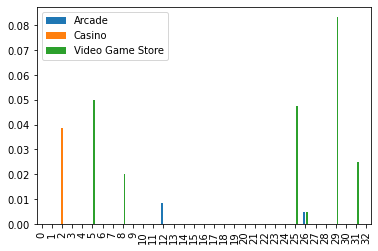

In [94]:
plotdata=chicago_esports
plotdata.plot(kind="bar")

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Middle Eastern Restaurant,Thrift / Vintage Store,Cuban Restaurant,Convenience Store,American Restaurant,Seafood Restaurant,Burrito Place,Design Studio,Rental Car Location,Gym
1,Auburn Gresham,Pharmacy,Bar,American Restaurant,Video Store,Bakery,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop
2,Bridgeport,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Sushi Restaurant,Casino,Taiwanese Restaurant,Chinese Restaurant,Scenic Lookout,Fried Chicken Joint
3,East Garfield Park,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
4,Englewood,Gas Station,Seafood Restaurant,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [104]:
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 1, 1, 3, 1, 1], dtype=int32)

In [107]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = df_merge

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,41.96822423,-87.73974749,1,Middle Eastern Restaurant,Thrift / Vintage Store,Cuban Restaurant,Convenience Store,American Restaurant,Seafood Restaurant,Burrito Place,Design Studio,Rental Car Location,Gym
1,Auburn Gresham,41.75064862,-87.65092232,1,Pharmacy,Bar,American Restaurant,Video Store,Bakery,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop
2,Bridgeport,41.84272915,-87.64624727,1,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Sushi Restaurant,Casino,Taiwanese Restaurant,Chinese Restaurant,Scenic Lookout,Fried Chicken Joint
3,East Garfield Park,41.88369802,-87.7089025,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
4,East Garfield Park,41.86966928,-87.71567245,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge


In [41]:
neighborhoods_venues_sorted.head(100)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Middle Eastern Restaurant,Thrift / Vintage Store,Cuban Restaurant,Convenience Store,American Restaurant,Seafood Restaurant,Burrito Place,Design Studio,Rental Car Location,Gym
1,Auburn Gresham,Pharmacy,Bar,American Restaurant,Video Store,Bakery,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop
2,Bridgeport,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Sushi Restaurant,Casino,Taiwanese Restaurant,Chinese Restaurant,Scenic Lookout,Fried Chicken Joint
3,East Garfield Park,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
4,Englewood,Gas Station,Seafood Restaurant,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
5,Gage Park,Fast Food Restaurant,Mexican Restaurant,Grocery Store,Dessert Shop,Convenience Store,Video Game Store,Mobile Phone Shop,Taco Place,Donut Shop,Sandwich Place
6,Grand Boulevard,Liquor Store,Train Station,Coffee Shop,Sports Bar,Breakfast Spot,Bakery,BBQ Joint,Southern / Soul Food Restaurant,Smoke Shop,Fast Food Restaurant
7,Hegewisch,Bar,Resort,Fast Food Restaurant,Hostel,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop,Yoga Studio
8,Humboldt Park,BBQ Joint,Park,Mexican Restaurant,Sandwich Place,Liquor Store,Bank,Mobile Phone Shop,Grocery Store,Shoe Store,Chinese Restaurant
9,Irving Park,Bus Station,Bar,Pizza Place,Diner,American Restaurant,Sandwich Place,Grocery Store,Eastern European Restaurant,Thai Restaurant,Pub


In [77]:
address = 'Chicago, IL, USA'

geolocator = Nominatim(user_agent="class-app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Chicago are 41.8755616, -87.6244212.


In [108]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [110]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Englewood,41.77256377,-87.63241932,0,Gas Station,Seafood Restaurant,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [111]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,41.96822423,-87.73974749,1,Middle Eastern Restaurant,Thrift / Vintage Store,Cuban Restaurant,Convenience Store,American Restaurant,Seafood Restaurant,Burrito Place,Design Studio,Rental Car Location,Gym
1,Auburn Gresham,41.75064862,-87.65092232,1,Pharmacy,Bar,American Restaurant,Video Store,Bakery,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop
2,Bridgeport,41.84272915,-87.64624727,1,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Sushi Restaurant,Casino,Taiwanese Restaurant,Chinese Restaurant,Scenic Lookout,Fried Chicken Joint
3,East Garfield Park,41.88369802,-87.7089025,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
4,East Garfield Park,41.86966928,-87.71567245,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
5,East Garfield Park,41.88041381,-87.71084273,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
6,East Garfield Park,41.86982456,-87.71590385,1,Pharmacy,Park,Liquor Store,Food,Fried Chicken Joint,Discount Store,Diner,Cosmetics Shop,Sports Bar,Lounge
8,Gage Park,41.78632805,-87.70513618,1,Fast Food Restaurant,Mexican Restaurant,Grocery Store,Dessert Shop,Convenience Store,Video Game Store,Mobile Phone Shop,Taco Place,Donut Shop,Sandwich Place
9,Grand Boulevard,41.82091083,-87.62652565,1,Liquor Store,Train Station,Coffee Shop,Sports Bar,Breakfast Spot,Bakery,BBQ Joint,Southern / Soul Food Restaurant,Smoke Shop,Fast Food Restaurant
10,Grand Boulevard,41.813971,-87.62119166,1,Liquor Store,Train Station,Coffee Shop,Sports Bar,Breakfast Spot,Bakery,BBQ Joint,Southern / Soul Food Restaurant,Smoke Shop,Fast Food Restaurant


In [112]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Oakland,41.81978129,-87.59992527,2,Park,Beach,Performing Arts Venue,Basketball Court,Restaurant,Grocery Store,Hotel,Public Art,Art Gallery,Juice Bar
43,Oakland,41.82631731,-87.60794545,2,Park,Beach,Performing Arts Venue,Basketball Court,Restaurant,Grocery Store,Hotel,Public Art,Art Gallery,Juice Bar
44,Oakland,41.81886863,-87.59851524,2,Park,Beach,Performing Arts Venue,Basketball Court,Restaurant,Grocery Store,Hotel,Public Art,Art Gallery,Juice Bar
45,Oakland,41.81886099,-87.59923619,2,Park,Beach,Performing Arts Venue,Basketball Court,Restaurant,Grocery Store,Hotel,Public Art,Art Gallery,Juice Bar
49,South Deering,41.71539824,-87.56871495,2,Park,Music Venue,Pizza Place,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [113]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Hegewisch,41.64845741,-87.54012317,3,Bar,Resort,Fast Food Restaurant,Hostel,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop,Yoga Studio


In [114]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,West Englewood,41.77916282,-87.6770312,4,Home Service,Indie Movie Theater,Liquor Store,Fast Food Restaurant,Farm,Elementary School,Ethiopian Restaurant,Event Space,Fabric Shop,Yoga Studio


In [120]:
len(chicago_grouped[chicago_grouped[ "Video Game Store"] > 0])

6

In [122]:
chicago_esports2 = chicago_grouped[["Neighborhood","Video Game Store"]]

In [126]:
chicago_esports2.head()

,Neighborhood,Video Game Store
0,Albany Park,0.0
1,Auburn Gresham,0.0
2,Bridgeport,0.0
3,East Garfield Park,0.0
4,Englewood,0.0


In [128]:
kclusters = 3

esports_clustering = chicago_esports2.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(esports_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [129]:
chicago_merged2 = chicago_esports2.copy()

# add clustering labels
chicago_merged2["Cluster Labels"] = kmeans.labels_

In [133]:
chicago_merged2.head()

,Neighborhood,Video Game Store,Cluster Labels
0,Albany Park,0.0,0
1,Auburn Gresham,0.0,0
2,Bridgeport,0.0,0
3,East Garfield Park,0.0,0
4,Englewood,0.0,0


In [134]:
chicago_merged2 = chicago_merged2.join(df_merge.set_index("Neighborhood"), on="Neighborhood")

print(chicago_merged2.shape)
chicago_merged2.head() # check the last columns!

(70, 5)


,Neighborhood,Video Game Store,Cluster Labels,Latitude,Longitude
0,Albany Park,0.0,0,41.96822423,-87.73974749
1,Auburn Gresham,0.0,0,41.75064862,-87.65092232
2,Bridgeport,0.0,0,41.84272915,-87.64624727
3,East Garfield Park,0.0,0,41.88369802,-87.7089025
3,East Garfield Park,0.0,0,41.86966928,-87.71567245


In [135]:
print(chicago_merged2.shape)
chicago_merged2.sort_values(["Cluster Labels"], inplace=True)
chicago_merged2

(70, 5)


,Neighborhood,Video Game Store,Cluster Labels,Latitude,Longitude
0,Albany Park,0.000000,0,41.96822423,-87.73974749
32,Woodlawn,0.000000,0,41.782231,-87.59801573
18,North Lawndale,0.000000,0,41.86484279,-87.69350892
18,North Lawndale,0.000000,0,41.86643977,-87.71218086
18,North Lawndale,0.000000,0,41.86736961,-87.70066623
18,North Lawndale,0.000000,0,41.86577114,-87.69274143
18,North Lawndale,0.000000,0,41.86568173,-87.69353304
18,North Lawndale,0.000000,0,41.86341092,-87.71929168
18,North Lawndale,0.000000,0,41.86308761,-87.70428319
19,Oakland,0.000000,0,41.81978129,-87.59992527


In [1]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged2['Latitude'], chicago_merged2['Longitude'],chicago_merged2['Neighborhood'], chicago_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'folium' is not defined